In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.layers import Dense 
from keras.layers import LeakyReLU,PReLU,ELU 
from keras.layers import Dropout

In [2]:
dataset= pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<AxesSubplot:>

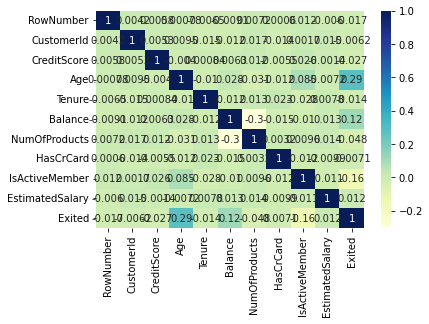

In [3]:
import seaborn as sns
sns.heatmap(data=dataset.corr(), annot=True, cmap='YlGnBu')

In [4]:
X= dataset.iloc[:,3:-1]
y=dataset.iloc[:,-1]
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [5]:
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender= pd.get_dummies(X['Gender'],drop_first=True)
X=pd.concat([X,geography,gender],axis=1)
X.drop(['Geography','Gender'],axis=1,inplace=True)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [7]:
classifier= Sequential()
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu',input_dim=11))
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))
classifier.summary()
classifier.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [8]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=50)

Epoch 1/50
536/536 [==============================] - 4s 4ms/step - loss: 0.6198 - accuracy: 0.6544 - val_loss: 0.5030 - val_accuracy: 0.7857
Epoch 2/50
536/536 [==============================] - 2s 3ms/step - loss: 0.4760 - accuracy: 0.7942 - val_loss: 0.4630 - val_accuracy: 0.7970
Epoch 3/50
536/536 [==============================] - 2s 3ms/step - loss: 0.4451 - accuracy: 0.7962 - val_loss: 0.4396 - val_accuracy: 0.7978
Epoch 4/50
536/536 [==============================] - 2s 3ms/step - loss: 0.4217 - accuracy: 0.8056 - val_loss: 0.4213 - val_accuracy: 0.8073
Epoch 5/50
536/536 [==============================] - 2s 3ms/step - loss: 0.4054 - accuracy: 0.8112 - val_loss: 0.4109 - val_accuracy: 0.8126
Epoch 6/50
536/536 [==============================] - 2s 3ms/step - loss: 0.3949 - accuracy: 0.8169 - val_loss: 0.4043 - val_accuracy: 0.8183
Epoch 7/50
536/536 [==============================] - 2s 3ms/step - loss: 0.3864 - accuracy: 0.8210 - val_loss: 0.4018 - val_accuracy: 0.8190
Epoch 

In [9]:
y_pred= classifier.predict(X_test)
y_pred= (y_pred>0.5)

63/63 [==============================] - 0s 2ms/step


In [10]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
cm= confusion_matrix(y_test,y_pred)
print(cm)
accuracy=accuracy_score(y_test,y_pred)
print('The accuracy of the model is',accuracy)
cl_report = classification_report(y_test,y_pred)
print(cl_report)
print(model_history.history.keys())

[[1517   78]
 [ 203  202]]
The accuracy of the model is 0.8595
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1595
           1       0.72      0.50      0.59       405

    accuracy                           0.86      2000
   macro avg       0.80      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


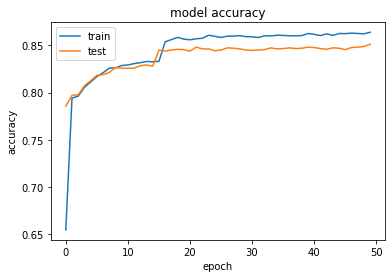

In [11]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()